# Serie Temporal: Acumulador

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates ## Formatear las fechas en el eje x para mostrar solo horas, minutos y segundos
import os
from datetime import datetime, timedelta, time

Cada archivo Excel representa mediciones de temperatura realizadas en diferentes días. Las mediciones de temperatura no fueron tomadas en días consecutivos, sino en días específicos distribuidos en diferentes meses. Por ejemplo, en noviembre se tomó un día, en diciembre en otro día, y así sucesivamente hasta tener 11 archivos de datos.

Dado que las mediciones no son tomadas diariamente, es importante tener en cuenta esta discontinuidad al analizar la serie temporal. Podríamos explorar cómo la frecuencia de muestreo irregular podría afectar los análisis y las conclusiones que podemos extraer de los datos.

Cada archivo Excel contiene datos de mediciones de temperatura representados por 9 columnas, donde cada columna corresponde a una ubicación de medición diferente (T1, T2, T3, ..., T9), y las filas representan el tiempo en segundos, cubriendo un período total de ocho horas.

In [2]:
# Se crea un diccionario para almacenar los marcos de datos.
dataframes = {}

data_folder = os.path.join('..','Date') #creamos el path

#verificamos que el path sea correcto y en caso que asi sea, vemos los nombres de archivos dentro
if os.path.isdir(data_folder):
    files = os.listdir(data_folder) # guardamos la lista
    print(files)

# Se define una función para leer cada archivo y convertirlo en un dataframe
def read_file(filename):
    df = pd.read_excel(os.path.join(data_folder,filename))
    dataframes[filename] = df #Se crea un elemento del diccionario -> dataframa[CLAVE] = VALOR

#Leo todos los archivos excel
for filename in files:
    read_file(filename)

['Medicion 01-03-2024.xlsx', 'Medicion 01-12-2023.xlsx', 'Medicion 02-03-2024.xlsx', 'Medicion 09-03-2024.xlsx', 'Medicion 11-03-2024.xlsx', 'Medicion 11-12-2023.xlsx', 'Medicion 13-12-2023.xlsx', 'Medicion 14-03-2024.xlsx', 'Medicion 15-12-2023.xlsx', 'Medicion 28-12-2023.xlsx', 'Medicion 30-11-2023.xlsx']


Los DataFrames df1, df2, ..., df11 corresponden a los datos de temperatura recopilados en los 11 días. Cada DataFrame contiene las mediciones de temperatura tomadas en un día específico, con las columnas representando las diferentes ubicaciones de medición (T1, T2, ..., T9) y las filas representando el tiempo en segundos.

In [3]:
# Lista para almacenar los DataFrames de Temperaturas
df_list = []
# Lista para almacenar los DataFrames de DateTime
df_date_list = []

for filename in files:
    # Suponiendo que tienes un DataFrame llamado dataframes y un nombre de archivo filename
    # Primero, convierte la columna "Date" en datetime
    dataframes[filename]['Date'] = pd.to_datetime(dataframes[filename]['Date'], errors='coerce')
    # Elimino las filas con NaT en la columna "Date" como referencia.
    dataframes[filename] = dataframes[filename].dropna(subset=['Date'])
    #dataframes[filename] = dataframes[filename].dropna(subset=['T1grasa'])
    # Selecciono las columnas 3 a 11, columnas de temperaturas. Lo guardo en un nuevo datafrema df.
    df = dataframes[filename].iloc[:, 3:12]
    #Sustituyo la columna "Date"(fecha) por una columna datetime donde tengo la fecha y hora.
    dataframes[filename]["Date"]=pd.to_datetime(dataframes[filename]["Date"].dt.strftime('%Y-%m-%d') + ' ' + dataframes[filename]["Time"].astype(str))
    #Inserto la clumna Date en el dataframe df. No utiilio df["Date"]=valor porque este me inserta la columna al final
    df_date = dataframes[filename]["Date"]
     # Agregar el DataFrame a la lista de DataFrame Temperaturas
    df_list.append(df)
    # Agregar el DataFrame a la lista de DataFrame DateTimes
    df_date_list.append(df_date)

#quito la fila del df 4 que tengan NaN y otros arreglso de columnas
df_list[4] = df_list[4].dropna(subset = ["T1grasa"])
df_list[0]["T8grasa"] = df_list[0]["T6grasa"]
df_list[10]["T9cera"] = df_list[10]["T7cera"]
df_list[2].at[0,"T8grasa"] = df_list[2].at[1,"T8grasa"]
df_date_list[4] = df_date_list[4].drop(df_date_list[4].index[0])
# Restablecer el índice
df_list[4] = df_list[4].reset_index(drop = True)
df_date_list[4] = df_date_list[4].reset_index(drop=True)
# Ahora df_list contiene los 11 DataFrames temperaturas
# Ahora df_list contiene los 11 DataFrames DateTimes

Con esta información, podemos realizar una variedad de análisis y visualizaciones para explorar las tendencias y patrones en los datos de temperatura a lo largo del tiempo, teniendo en cuenta la irregularidad en la frecuencia de muestreo entre los diferentes días.

# Visualizacion de Datos

Visualización de una Columna Temperatura del primer datafreme vs el tiempo

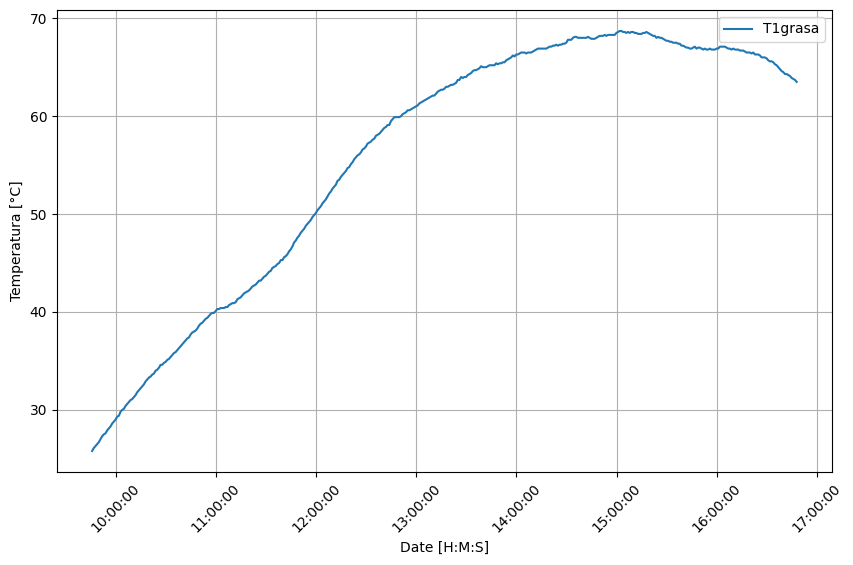

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(df_date_list[0],df_list[0][df_list[0].columns[0]], label=df_list[0].columns[0])
ax.set_xlabel("Date [H:M:S]")
ax.set_ylabel("Temperatura [°C]")
ax.grid()
ax.legend(loc='upper right')
# Muestro solo horas, minutos y segundos
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.show()

hago un zoom donde podria estar el puno de inflexion que nos interasa

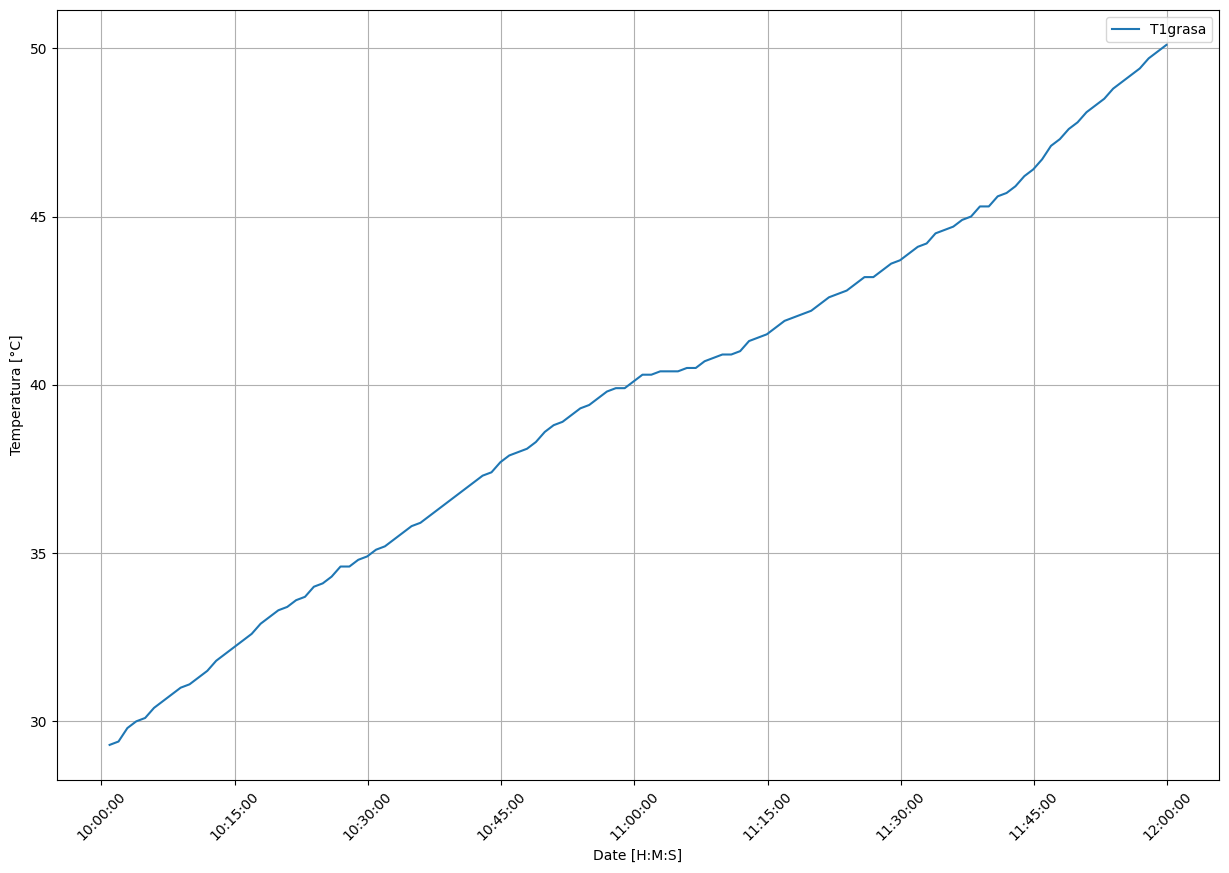

In [5]:
# Creamos una máscara booleana para filtrar las filas donde el tiempo sea mayor o igual a las 12:00:00
# y menor que las 13:00:00
mask = (df_date_list[0].dt.time >= pd.to_datetime('10:00:00').time()) & \
       (df_date_list[0].dt.time < pd.to_datetime('12:00:00').time())

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(df_date_list[0][mask],df_list[0][df_list[0].columns[0]][mask], label=df_list[0].columns[0])
ax.set_xlabel("Date [H:M:S]")
ax.set_ylabel("Temperatura [°C]")
ax.grid()
ax.legend(loc='upper right')
# Muestro solo horas, minutos y segundos
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.show()

Visualización de todas Columnas Temperaturas del primer datafreme vs el tiempo

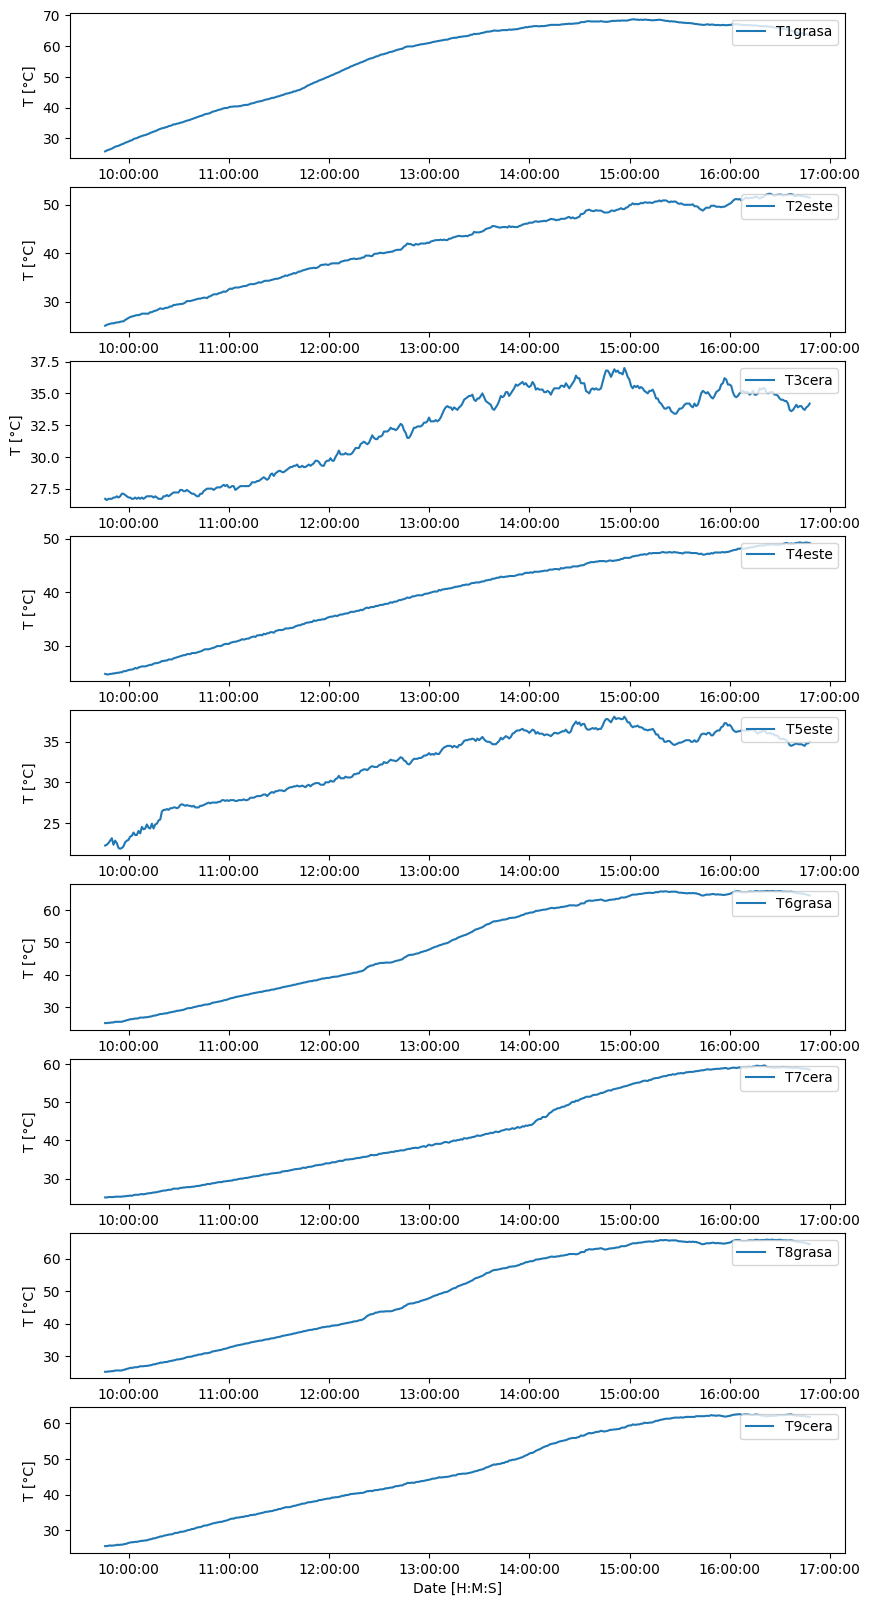

In [6]:
df_columns = df_list[0].columns #Nombre de las columnas de temperatua de los datafrmae, por eso 1:
fig, axs = plt.subplots(df_list[0].shape[1],1, figsize = (10,20))
for i in range(df_list[0].shape[1]):
    axs[i].plot(df_date_list[0],df_list[0][df_columns[i]], label=df_columns[i])
    axs[i].legend(loc='upper right')# Muestro solo horas, minutos y segundos
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    axs[i].set_xlabel("Date [H:M:S]")
    axs[i].set_ylabel("T [°C]")
plt.show()

Comparo cómo varían las temperaturas registradas en la columna T1 en cada uno de los 11 DataFrames que tengo, y asi con las demas columnas de temperaturas. Dado que estos DataFrames tienen diferentes marcas de tiempo, en lugar de mostrar el tiempo en el eje x de mis gráficos, solo quiero representar las temperaturas en función del índice de fila o alguna otra métrica común. De esta manera, podré visualizar fácilmente las diferencias en las temperaturas T1 entre los diferentes DataFrames y analizar cualquier patrón o discrepancia en los datos.

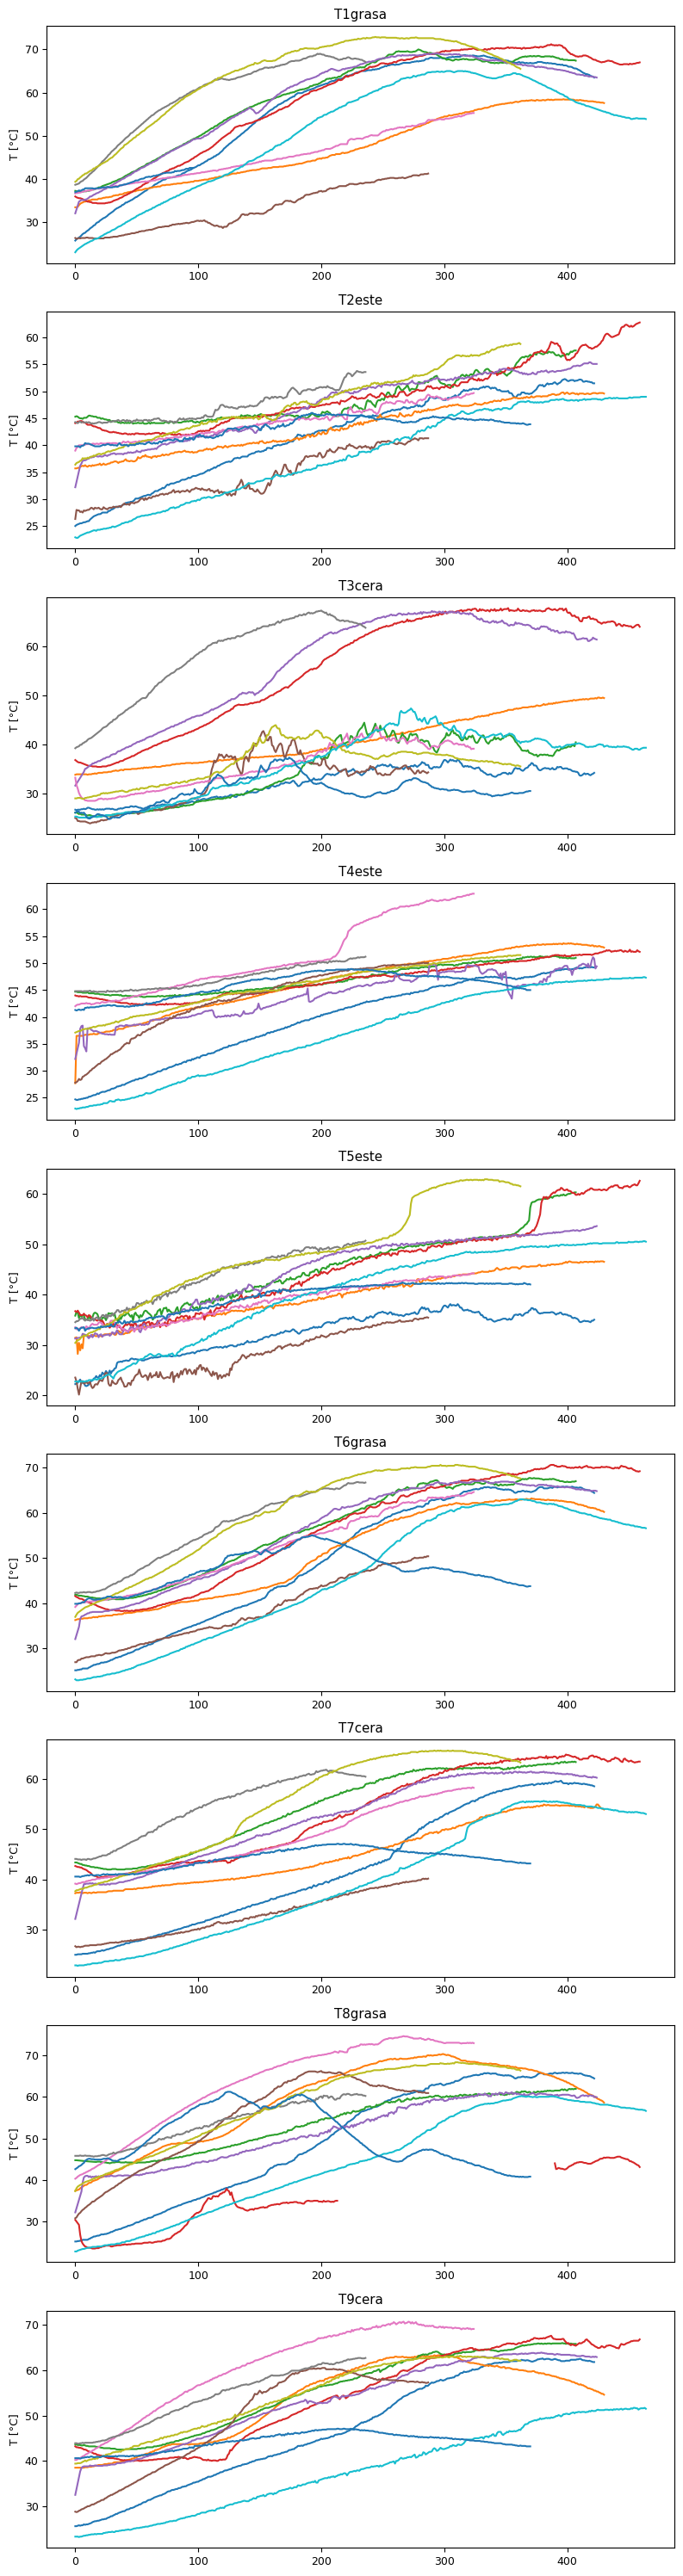

In [7]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)
df_columns = df_list[0].columns

fig, axs = plt.subplots(len(df_columns),1, figsize=(8,30))
for i in range(len(df_columns)):   
    for j in range(len(df_list)):
        axs[i].plot(df_list[j][df_columns[i]], '-')
    axs[i].set_title(df_columns[i])
    axs[i].set_ylabel("T [°C]")
fig.tight_layout()
plt.show()

Antes que todo vamos a organiar los datos para poder manejarlos mejor en los calculos y plteos.

Vamos a acomodar los datos de acuerdo a las temperaturas correspondiente.

In [9]:
df_temp_list = []
for col in df_columns:
    df = pd.DataFrame()
    for j in range(len(df_list)):
        df[col+str(j)] = df_list[j][col]
    df_temp_list.append(df)

In [10]:
df_list[1]["T1grasa"].shape

(431,)

Visualizamos el nuevo dataframe para entender que graficamos lo mismo que lo enterior, pero este dataframe esta reaoganizado

In [17]:
# Crear el directorio para guardar las imágenes si no existe
path_img = os.path.join("..","img","Datos-crudos")
os.makedirs(path_img, exist_ok=True)

# Generar y guardar cada gráfico por separado
for i, col in enumerate(df_columns):
    plt.figure(figsize=(15, 5))  # Tamaño del gráfico
    plt.plot(df_temp_list[i])   # Datos para el gráfico
    plt.title(col)              # Título del gráfico
    plt.xlabel("t [min]")        # Etiqueta del eje x
    plt.ylabel("T [C°]")   # Etiqueta del eje y
    plt.grid(True)              # Mostrar cuadrícula
    plt.savefig(os.path.join(path_img,f"{col}.png"), bbox_inches='tight')  # Guardar el gráfico en formato PNG
    plt.close()  # Cerrar la figura actual para liberar memoria

print("Gráficos guardados en la carpeta 'img'.")

Gráficos guardados en la carpeta 'img'.


# Media movil

In [18]:
def ma(t, x, ws= 5):
    ''' Funcion para calcular la media movil de una serie temporal (simetrica)
        Entradas:
            - t: timestamps
            - x: serie datos
            - ws: tamaño de la ventana (intervalo de timestamps, 
            laventana se posiciona en un valor t_0, y abarca 2.5 <- 
            y 2.5 -> y tengo mi ventana de 5 (datos))
        Salidas:
            - t: timestamps
            - y: media movil
    '''

    assert ws%2 == 1, 'ws debe ser entero e impar'  #assert: se espera que...
    n_samples = x.shape[0] #numero total de filas
    n_windows = n_samples - ws + 1
    tstamps = [] 
    y = [] #list para guardar los valores de la media movil
    for i in range(0, n_windows):
        left =  i
        right = i + ws 
        y.append(x[left:right].mean())
        tstamps.append(t[(left+right)//2])
    return tstamps, y

In [19]:
ws = 5
media_movil = []
for dia in range(len(df_list)):
    df_d = pd.DataFrame()
    for col in df_columns:
        t, d = ma(df_date_list[dia],df_list[dia][col], ws=ws)
        df_d[col] = pd.Series(d)
    df_d.insert(0,"Date",t)
    media_movil.append(df_d)

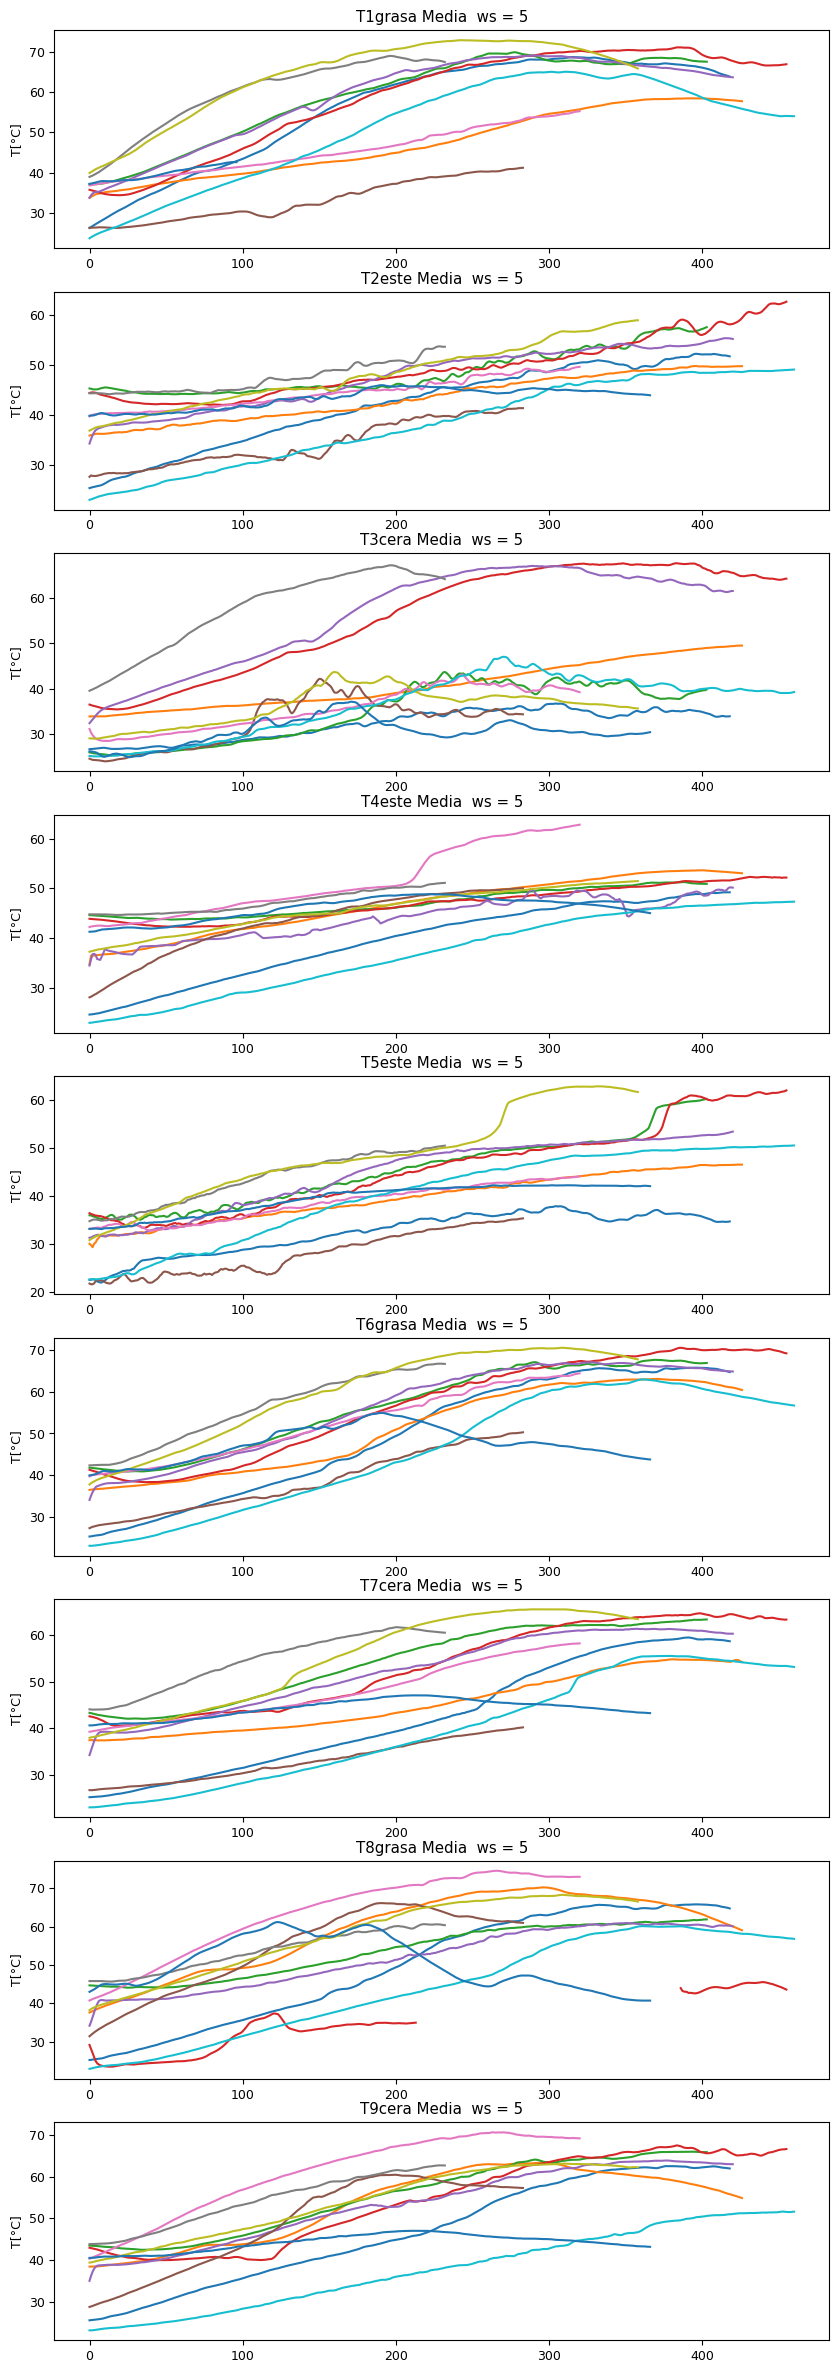

In [13]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)

cont = 0
fig, axs = plt.subplots(9,1, figsize=(10,30))
for col in df_columns:
    for dia in range(len(media_movil)):
        axs[cont].plot(media_movil[dia][col],'-', label = f"día: {dia}")

    axs[cont].set_title(col+f" Media  ws = {ws}" )
    axs[cont].set_ylabel("T[°C]")
    cont += 1

plt.show()

Guardo las graficas de las medias

In [23]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)

# Crear el directorio para guardar las imágenes si no existe
path_img = os.path.join("..","img","Medias_movil")
os.makedirs(path_img, exist_ok=True)

for  col in df_columns:
    plt.figure(figsize=(15, 5))  # Tamaño del gráfico
    for dia in range(len(media_movil)):
        plt.plot(media_movil[dia][col],'-', label = f"día: {dia}")

    plt.title(col+f", ventana_movil = {ws}" )
    plt.xlabel("t [min]")        # Etiqueta del eje x
    plt.ylabel("T[°C]")
    plt.grid(True)              # Mostrar cuadrícula
    plt.savefig(os.path.join(path_img,f"{col}.png"), bbox_inches='tight')  # Guardar el gráfico en formato PNG
    plt.close()  # Cerrar la figura actual para liberar memoria

print("Gráficos guardados en la carpeta 'img'.")

Gráficos guardados en la carpeta 'img'.


# ERROR DE MEDICIÓN

In [24]:
#Realizo la diferencia
df_list_new = df_list[0][2:-2].reset_index(drop = True)
dif = df_list_new - media_movil[0].iloc[:,1:10]
dif.insert(0,"Date",media_movil[0]["Date"])

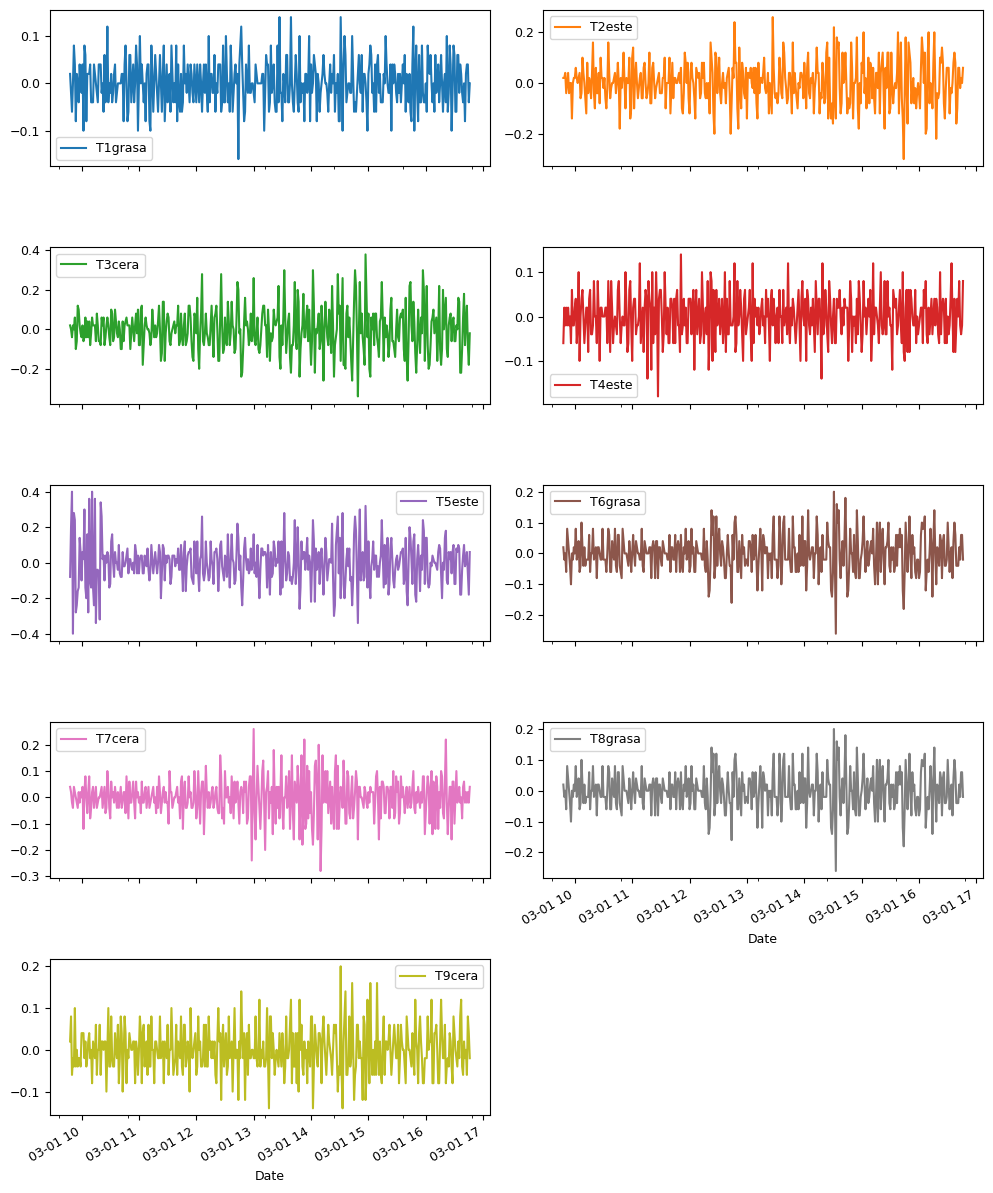

In [25]:
dif.plot(x = "Date", subplots=True, layout=(5,2), figsize=(10, 12))
plt.tight_layout()
plt.show()

vemos si podemos acomdar los dataframe de las medias_moviles

In [33]:
media_movil_list = []
media_col = media_movil[0].columns[1:] #ignoro a Date
for col in media_col:
    df_media2 = pd.DataFrame()
    for i, list in enumerate(media_movil):
        df_media2[col+str(i)] = list[col]

    media_movil_list.append(df_media2)

# Media y Desviacion Estandar

Para cada conjunto de datos de temperatura (por ejemplo, T1), calculamos la media y la desviación estándar. Esto nos proporciona una medida de la tendencia central (media) y la dispersión (desviación estándar) de las temperaturas registradas durante el lapso de 8 horas en el que se realizaron las mediciones

In [34]:
# calculamos la media y la desviacion estandar para cada hora sobre los 30 días
df_mean = pd.DataFrame() #dataframe vacio
df_std = pd.DataFrame()
for i, media in enumerate(media_movil_list):
    df_mean[media_col[i]] = media.mean(axis=1)
    df_std[media_col[i]] = media.std(axis=1)

axis=1, calculo de la media o la desviación estándar para cada fila, es decir nos movemos de manera horizontalmente a lo largo del DataFrame. Si quier para cada columna axis = 0.

In [35]:
df_std.shape[0]

419

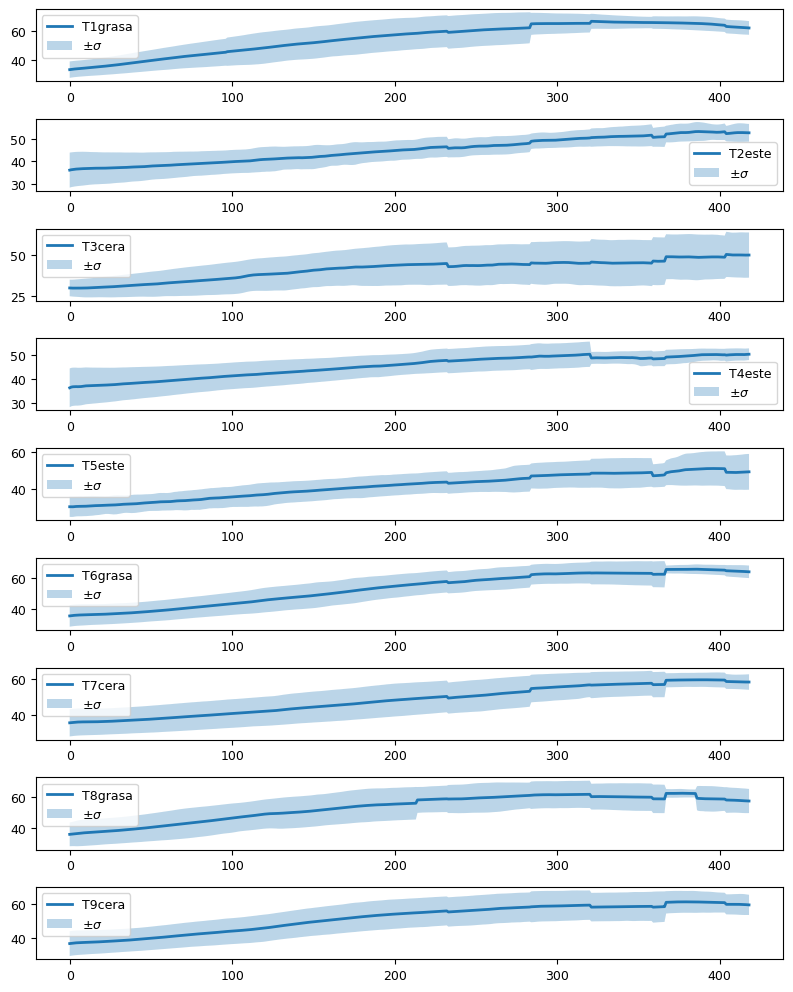

In [36]:
# haciendo un dibujito lindo e intuitivo

#reproducimos el grafico anterior para entender que hicimos
len_mean = df_mean.shape[0]
fig, axs = plt.subplots(len(media_col),1, figsize=(8,10))
for i, col in enumerate(media_col):
    axs[i].plot(df_mean[col], label=col, lw = 2)
    
    down = df_mean[col] - df_std[col]
    up = df_mean[col] + df_std[col]

    axs[i].fill_between(np.arange(len_mean),down, up, label=r'$\pm \sigma$', alpha = 0.3)
    axs[i].legend()

fig.tight_layout()
plt.show()

In [37]:
# mejorando el dibujito para impresionar en el informe

# Podemos ponerle intensidad de colores a cada día según más o menos cerca se encuentre de la media,
# para ello asignamos un coeficiente (el MAE) de todo un día respecto de la media 
def mae(y, y_hat):
    return (y-y_hat).abs().mean(axis = 0)

mae_list = []
# para cada día calculamos el mae
for media in media_movil:
    mae_coef = mae(media.iloc[:,1:], df_mean).to_frame().T
    mae_list.append(mae_coef)

mae_coef = pd.concat(mae_list, ignore_index = True)
mae_coef = (mae_coef - mae_coef.min(axis = 0))/(mae_coef.max(axis = 0)- mae_coef.min(axis=0)) # normalizamos los coeficientes
#mae_coef = (np.array(mae_coef)-np.min(mae_coef, axis=0) )/(np.max(mae_coef, axis=0)-np.min(mae_coef, axis=0)) 

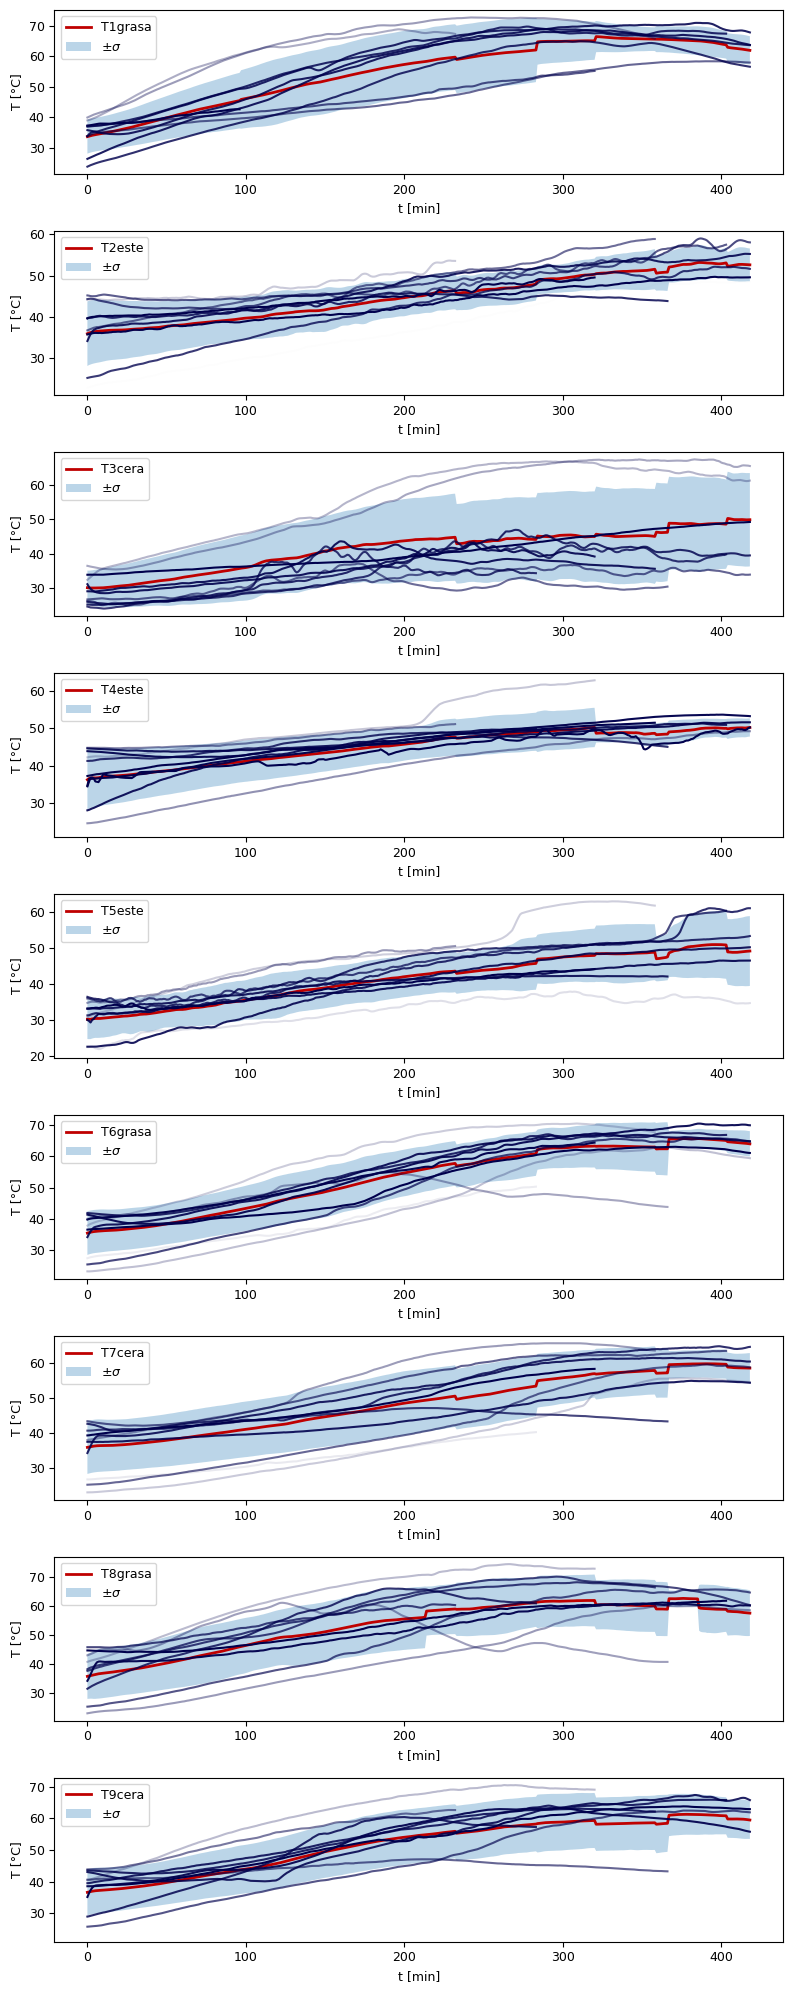

In [38]:
#reproducimos el grafico anterior para entender que hicimos

len_mean = df_mean.shape[0]
fig, axs = plt.subplots(len(media_col),1, figsize=(8,20))
for i, col in enumerate(media_col):
    axs[i].plot(df_mean[col],color = (0.75,0,0),  label=col, lw = 2)

    down = df_mean[col] - df_std[col]
    up = df_mean[col] + df_std[col]

    axs[i].fill_between(np.arange(len_mean),down, up, label=r'$\pm \sigma$', alpha = 0.3)
    
    movil_col= media_movil_list[i].columns
    for j, mc in enumerate(movil_col):
        axs[i].plot(media_movil_list[i][mc], color = (0,0,0.3), alpha = 1 - mae_coef[col].iloc[j])

    axs[i].set_xlabel("t [min]")
    axs[i].set_ylabel("T [°C]")
    axs[i].legend()
fig.tight_layout()
plt.show()

Guardo las graficas de desviaciones sobre la media

In [41]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)

# Crear el directorio para guardar las imágenes si no existe
path_img = os.path.join("..","img","Desviaciones")
os.makedirs(path_img, exist_ok=True)

len_mean = df_mean.shape[0]
for i, col in enumerate(media_col):
    plt.figure(figsize=(15, 5))  # Tamaño del gráfico
    plt.plot(df_mean[col],color = (0.75,0,0),  label=col, lw = 2)

    down = df_mean[col] - df_std[col]
    up = df_mean[col] + df_std[col]

    plt.fill_between(np.arange(len_mean),down, up, label=r'$\pm \sigma$', alpha = 0.3)
    
    movil_col= media_movil_list[i].columns
    for j, mc in enumerate(movil_col):
        plt.plot(media_movil_list[i][mc], color = (0,0,0.3), alpha = 1 - mae_coef[col].iloc[j])

    plt.xlabel("t [min]")        # Etiqueta del eje x
    plt.ylabel("T[°C]")
    plt.grid(True)              # Mostrar cuadrícula
    plt.legend()
    plt.savefig(os.path.join(path_img,f"{col}.png"), bbox_inches='tight')  # Guardar el gráfico en formato PNG
    plt.close()  # Cerrar la figura actual para liberar memoria

print("Gráficos guardados en la carpeta 'img'.")

Gráficos guardados en la carpeta 'img'.
